# Thesis - Classification Analysis 

By: Jimuel Celeste, Jr. 

Objective: To analyze the results of classification model training (nested cross-validation).

In [1]:
import math
import os 
import pickle 

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns 
import sklearn 

In [2]:
sns.set_context('paper')
sns.set_style('ticks')

## Data

In [3]:
data = '/Users/jimuelcelestejr/Downloads/Dataset/Thesis - Analysis/classification/Table. Results - Classification.csv'
df = pd.read_csv(data)
df.head()

,feature_set,model,cv_english,cv_std,ev_english_1,ev_english_2,ev_greek,ev_chinese
0,eGeMAPS,SVM,0.70,0.03,0.60,0.55,0.57,0.51
1,eGeMAPS,Random Forest,0.70,0.03,0.61,0.51,0.56,0.63
2,eGeMAPS,Logistic Regression,0.65,0.04,0.60,0.49,0.55,0.63
3,eGeMAPS,XGBoost,0.69,0.03,0.55,0.50,0.56,0.59
4,eGeMAPS,Naive Bayes,0.59,0.02,0.54,0.51,0.48,0.56


In [4]:
df['feature_set'].value_counts()

feature_set
eGeMAPS    6
LFTK       6
BoAW       6
wav2vec    6
BERT       6
Name: count, dtype: int64

In [5]:
df['model'].value_counts()

model
SVM                      5
Random Forest            5
Logistic Regression      5
XGBoost                  5
Naive Bayes              5
Multilayer Perceptron    5
Name: count, dtype: int64

5 feature sets, 6 models

## Internal Cross-Validation

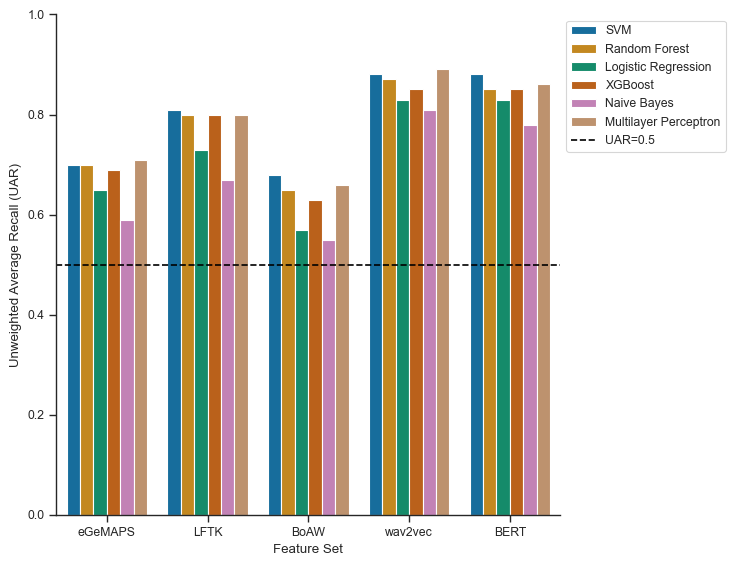

In [6]:
fig = plt.figure(figsize=(6.5,6.5))
# fig.suptitle("Internal Cross-Validation Performance")

plt.ylim(0.0,1.0)
plt.xlabel("Feature Set")
plt.ylabel("Unweighted Average Recall (UAR)")

g = sns.barplot(
    data=df, x="feature_set", y="cv_english", hue="model",
    errorbar="sd", palette="colorblind"
)
g.axhline(y=0.5, color='black', linestyle='--', label='UAR=0.5')
g.legend()

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1), title="")
sns.despine()

output_dir = '/Users/jimuelcelestejr/Downloads/Dataset/Thesis - Analysis/classification'
output_file = os.path.join(output_dir, 'clf_cv.png')
fig.savefig(output_file, dpi=300, bbox_inches='tight')

In [7]:
model = df.groupby('model')['cv_english'].describe()
model

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
Logistic Regression,5.0,0.722,0.113666,0.57,0.65,0.73,0.83,0.83
Multilayer Perceptron,5.0,0.784,0.097622,0.66,0.71,0.80,0.86,0.89
Naive Bayes,5.0,0.680,0.114018,0.55,0.59,0.67,0.78,0.81
Random Forest,5.0,0.774,0.095551,0.65,0.70,0.80,0.85,0.87
SVM,5.0,0.790,0.095917,0.68,0.70,0.81,0.88,0.88
XGBoost,5.0,0.764,0.099398,0.63,0.69,0.80,0.85,0.85


In [8]:
for m in model.index:
    print("%.2f (%.2f, %.2f-%.2f)" % (model.loc[m, 'mean'], model.loc[m, 'std'], model.loc[m, 'min'], model.loc[m, 'max']), m)

0.72 (0.11, 0.57-0.83) Logistic Regression
0.78 (0.10, 0.66-0.89) Multilayer Perceptron
0.68 (0.11, 0.55-0.81) Naive Bayes
0.77 (0.10, 0.65-0.87) Random Forest
0.79 (0.10, 0.68-0.88) SVM
0.76 (0.10, 0.63-0.85) XGBoost


In [9]:
feature = df.groupby('feature_set')['cv_english'].describe()
feature

,count,mean,std,min,25%,50%,75%,max
feature_set,,,,,,,,
BERT,6.0,0.841667,0.034303,0.78,0.8350,0.850,0.8575,0.88
BoAW,6.0,0.623333,0.052026,0.55,0.5850,0.640,0.6575,0.68
LFTK,6.0,0.768333,0.056362,0.67,0.7475,0.800,0.8000,0.81
eGeMAPS,6.0,0.673333,0.045898,0.59,0.6600,0.695,0.7000,0.71
wav2vec,6.0,0.855000,0.030822,0.81,0.8350,0.860,0.8775,0.89


In [10]:
for f in feature.index:
    print("%.2f (%.2f, %.2f-%.2f)" % (feature.loc[f, 'mean'], feature.loc[f, 'std'], feature.loc[f, 'min'], feature.loc[f, 'max']), f)

0.84 (0.03, 0.78-0.88) BERT
0.62 (0.05, 0.55-0.68) BoAW
0.77 (0.06, 0.67-0.81) LFTK
0.67 (0.05, 0.59-0.71) eGeMAPS
0.85 (0.03, 0.81-0.89) wav2vec


## External Validation

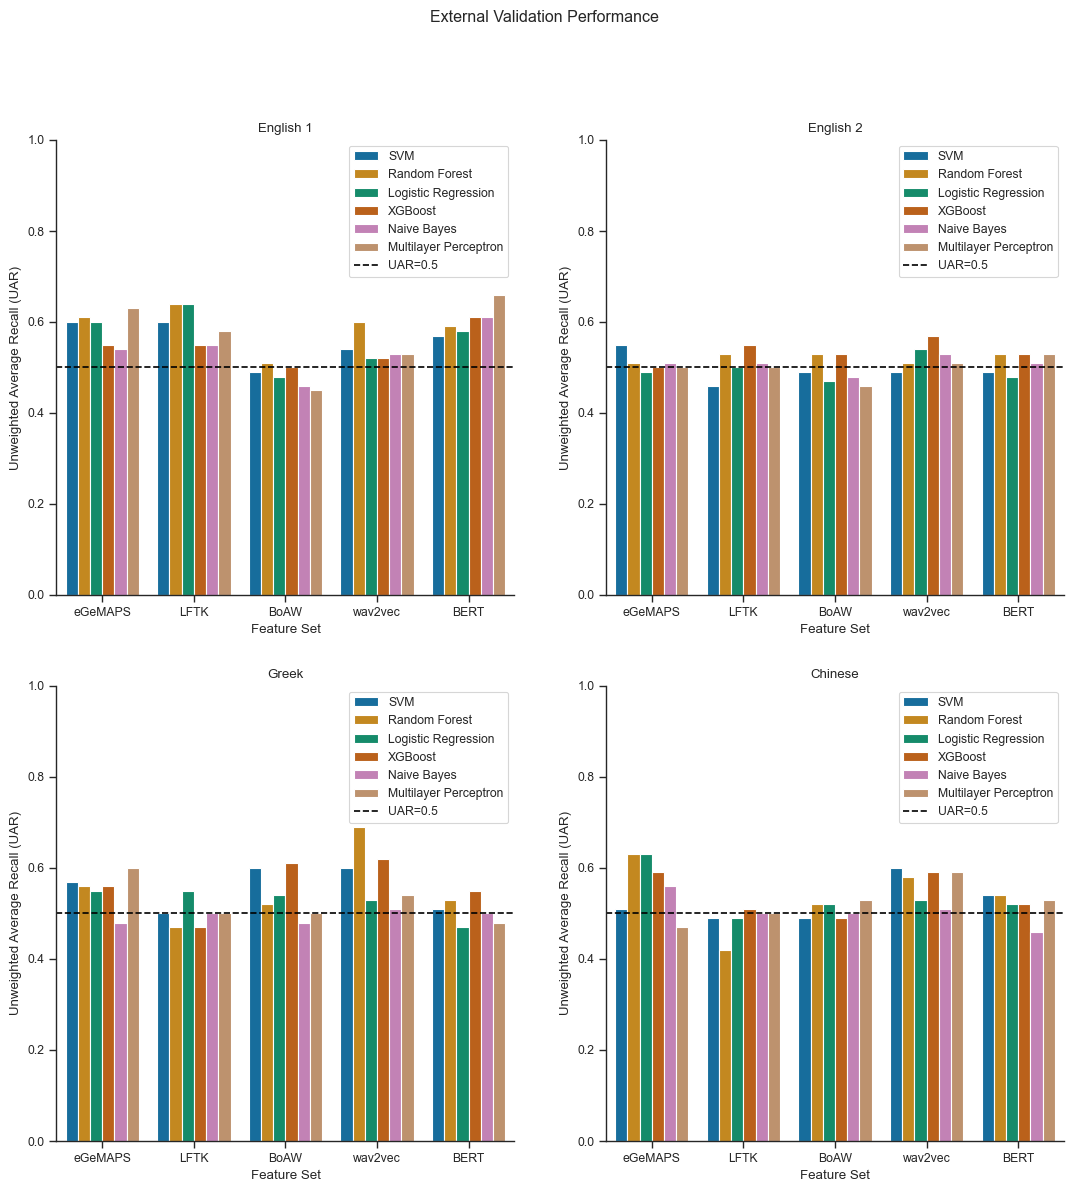

In [11]:
ev_set = {
    'ev_chinese': 'Chinese',
    'ev_greek': 'Greek',
    'ev_english_2': 'English 2', 
    'ev_english_1': 'English 1',
}
ev_set_keys = list(ev_set.keys())

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(13, 13)
fig.suptitle("External Validation Performance")

for i in range(2):
    for j in range(2):
        ev = ev_set_keys.pop()
        g = sns.barplot(
            data=df, x="feature_set", y=ev, hue="model",
            errorbar="sd", palette="colorblind", ax=axs[i,j]
        )
        axs[i,j].set_ylim(0,1)
        axs[i,j].set_title(ev_set[ev])
        axs[i,j].set_xlabel("Feature Set")
        axs[i,j].set_ylabel("Unweighted Average Recall (UAR)")
        axs[i,j].axhline(y=0.5, color='black', linestyle='--', label='UAR=0.5')
        axs[i,j].legend()
        sns.despine()

output_file = os.path.join(output_dir, 'clf_ev.png')
fig.savefig(output_file, dpi=500, bbox_inches='tight')

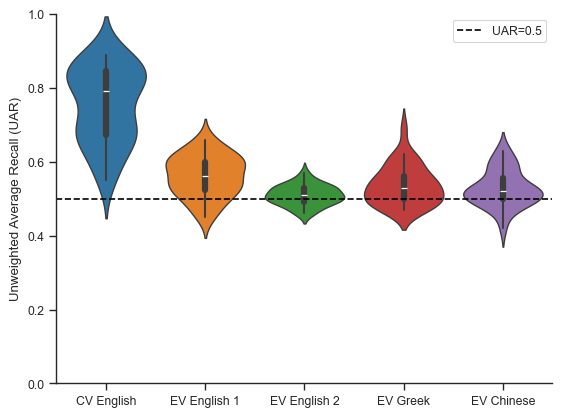

In [12]:
temp = df[['cv_english', 'ev_english_1', 'ev_english_2', 'ev_greek', 'ev_chinese']]
temp = temp.rename(columns={
    'cv_english': 'CV English',
    'ev_english_1': 'EV English 1', 
    'ev_english_2': 'EV English 2', 
    'ev_greek': 'EV Greek', 
    'ev_chinese': 'EV Chinese'
})

sns.violinplot(temp)#, split=True, inner="quart")
plt.ylim(0, 1)
# plt.suptitle('Internal Cross-Validation (CV) vs. External Validation (EV) Performance')
plt.ylabel('Unweighted Average Recall (UAR)')
plt.axhline(y=0.5, color='black', linestyle='--', label='UAR=0.5')
plt.legend()
sns.despine()

output_file = os.path.join(output_dir, 'clf_cv_ev.png')
plt.savefig(output_file, dpi=500, bbox_inches='tight')

In [13]:
evs = ['ev_english_1', 'ev_english_2', 'ev_greek', 'ev_chinese']

for ev in evs:
    print(ev)
    
    model = df.groupby('model')[ev].describe()
    for m in model.index:
        print("%.2f (%.2f, %.2f-%.2f)" % (model.loc[m, 'mean'], model.loc[m, 'std'], model.loc[m, 'min'], model.loc[m, 'max']), m)

ev_english_1
0.56 (0.06, 0.48-0.64) Logistic Regression
0.57 (0.08, 0.45-0.66) Multilayer Perceptron
0.54 (0.05, 0.46-0.61) Naive Bayes
0.59 (0.05, 0.51-0.64) Random Forest
0.56 (0.05, 0.49-0.60) SVM
0.55 (0.04, 0.50-0.61) XGBoost
ev_english_2
0.50 (0.03, 0.47-0.54) Logistic Regression
0.50 (0.03, 0.46-0.53) Multilayer Perceptron
0.51 (0.02, 0.48-0.53) Naive Bayes
0.52 (0.01, 0.51-0.53) Random Forest
0.50 (0.03, 0.46-0.55) SVM
0.54 (0.03, 0.50-0.57) XGBoost
ev_greek
0.53 (0.03, 0.47-0.55) Logistic Regression
0.52 (0.05, 0.48-0.60) Multilayer Perceptron
0.49 (0.01, 0.48-0.51) Naive Bayes
0.55 (0.08, 0.47-0.69) Random Forest
0.56 (0.05, 0.50-0.60) SVM
0.56 (0.06, 0.47-0.62) XGBoost
ev_chinese
0.54 (0.05, 0.49-0.63) Logistic Regression
0.52 (0.04, 0.47-0.59) Multilayer Perceptron
0.51 (0.04, 0.46-0.56) Naive Bayes
0.54 (0.08, 0.42-0.63) Random Forest
0.53 (0.05, 0.49-0.60) SVM
0.54 (0.05, 0.49-0.59) XGBoost


In [14]:
for ev in evs:
    print(ev)
    
    feature = df.groupby('feature_set')[ev].describe()
    for f in feature.index:
        print("%.2f (%.2f, %.2f-%.2f)" % (feature.loc[f, 'mean'], feature.loc[f, 'std'], feature.loc[f, 'min'], feature.loc[f, 'max']), f)

ev_english_1
0.60 (0.03, 0.57-0.66) BERT
0.48 (0.02, 0.45-0.51) BoAW
0.59 (0.04, 0.55-0.64) LFTK
0.59 (0.04, 0.54-0.63) eGeMAPS
0.54 (0.03, 0.52-0.60) wav2vec
ev_english_2
0.51 (0.02, 0.48-0.53) BERT
0.49 (0.03, 0.46-0.53) BoAW
0.51 (0.03, 0.46-0.55) LFTK
0.51 (0.02, 0.49-0.55) eGeMAPS
0.52 (0.03, 0.49-0.57) wav2vec
ev_greek
0.51 (0.03, 0.47-0.55) BERT
0.54 (0.05, 0.48-0.61) BoAW
0.50 (0.03, 0.47-0.55) LFTK
0.55 (0.04, 0.48-0.60) eGeMAPS
0.58 (0.07, 0.51-0.69) wav2vec
ev_chinese
0.52 (0.03, 0.46-0.54) BERT
0.51 (0.02, 0.49-0.53) BoAW
0.49 (0.03, 0.42-0.51) LFTK
0.56 (0.07, 0.47-0.63) eGeMAPS
0.57 (0.04, 0.51-0.60) wav2vec


## Best Features and Models

In [15]:
df.groupby('feature_set')['cv_english'].describe()

,count,mean,std,min,25%,50%,75%,max
feature_set,,,,,,,,
BERT,6.0,0.841667,0.034303,0.78,0.8350,0.850,0.8575,0.88
BoAW,6.0,0.623333,0.052026,0.55,0.5850,0.640,0.6575,0.68
LFTK,6.0,0.768333,0.056362,0.67,0.7475,0.800,0.8000,0.81
eGeMAPS,6.0,0.673333,0.045898,0.59,0.6600,0.695,0.7000,0.71
wav2vec,6.0,0.855000,0.030822,0.81,0.8350,0.860,0.8775,0.89


Rank: wav2vec, BERT, LFTK, eGeMAPS, BoAW

In [16]:
df.groupby('model')['cv_english'].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
Logistic Regression,5.0,0.722,0.113666,0.57,0.65,0.73,0.83,0.83
Multilayer Perceptron,5.0,0.784,0.097622,0.66,0.71,0.80,0.86,0.89
Naive Bayes,5.0,0.680,0.114018,0.55,0.59,0.67,0.78,0.81
Random Forest,5.0,0.774,0.095551,0.65,0.70,0.80,0.85,0.87
SVM,5.0,0.790,0.095917,0.68,0.70,0.81,0.88,0.88
XGBoost,5.0,0.764,0.099398,0.63,0.69,0.80,0.85,0.85


Rank: Support Vector Machine, Multilayer Perceptron, Random Forest, XGBoost, Logistic Regression, Naïve Bayes

## Interpretable Features

eGeMAPS and LFTK are the only interpretable feature sets among the 5. 

Objective: To interpret feature importance through Principal Component Analysis.

## eGeMAPS PCA

Objective: To identify the most influential acoustic features.

1. What are these features? What do they represent?
2. How do the findings align with prior findings?

In [17]:
df[df['feature_set']=='eGeMAPS']

,feature_set,model,cv_english,cv_std,ev_english_1,ev_english_2,ev_greek,ev_chinese
0,eGeMAPS,SVM,0.70,0.03,0.60,0.55,0.57,0.51
1,eGeMAPS,Random Forest,0.70,0.03,0.61,0.51,0.56,0.63
2,eGeMAPS,Logistic Regression,0.65,0.04,0.60,0.49,0.55,0.63
3,eGeMAPS,XGBoost,0.69,0.03,0.55,0.50,0.56,0.59
4,eGeMAPS,Naive Bayes,0.59,0.02,0.54,0.51,0.48,0.56
5,eGeMAPS,Multilayer Perceptron,0.71,0.04,0.63,0.50,0.60,0.47


Best models: MLP/SVM/Random Forest/XGBoost

The MLP model will be analyzed.

In [18]:
model = '/Users/jimuelcelestejr/Downloads/Dataset/Thesis - Machine Learning/Classification/Nested Cross-Validation/eGeMAPS/multilayer_perceptron_classifier/final_model/model.pkl'
with open(model, 'rb') as f:
    pipe = pickle.load(f)

In [19]:
pipe

Pipeline(steps=[('feature_scaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('model',
                 MLPClassifier(hidden_layer_sizes=100, max_iter=10000))])

### Scree Plot (scree = "loose stones")

In [20]:
pca = pipe[1]
pca

PCA(n_components=0.9)

The selected components capture 90% of the variance.

In [21]:
len(pca.components_)

27

27 components

In [22]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.18343228, 0.1630524 , 0.10930497, 0.05902386, 0.04191955,
       0.04024799, 0.0339725 , 0.02864005, 0.0244968 , 0.02041341,
       0.0179572 , 0.01618889, 0.01559781, 0.01386717, 0.01353239,
       0.01259151, 0.01200763, 0.01167706, 0.01137946, 0.01136805,
       0.01094868, 0.01059058, 0.0098945 , 0.00969749, 0.00893153,
       0.00845595, 0.00824656])

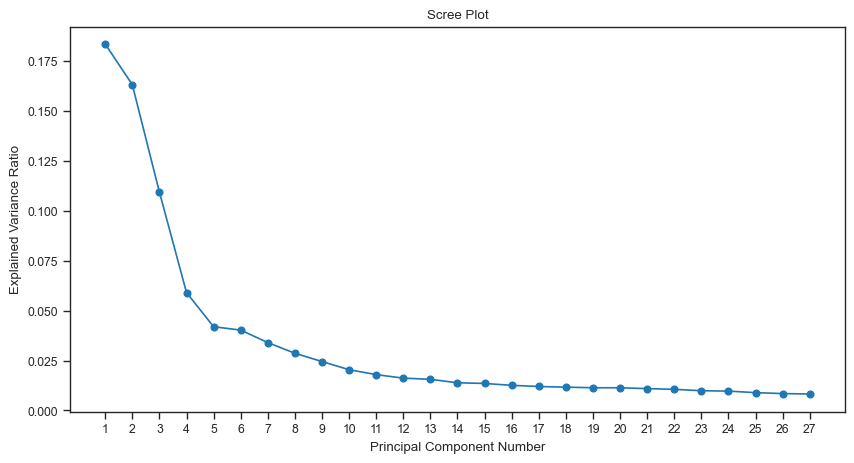

In [23]:
comp_nums = range(1, len(explained_variance_ratio) + 1)
plt.figure(figsize=(10, 5))
plt.xticks(comp_nums)
plt.plot(comp_nums, explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio') # Eigenvalue

output_file = os.path.join(output_dir, 'clf_egemaps_scree.png')
plt.savefig(output_file, dpi=500, bbox_inches='tight')

The elbow seems to appear on component 5.

In [24]:
sum(explained_variance_ratio[:5])

0.5567330580721731

5 principal components capture 56% of the variance. 

The rest are "scree" (a mass of small loose stones that form or cover a slope on a mountain).

#### Loadings Plot (coefficients of the linear combination) 

In [25]:
sca = pipe[0]
sca

StandardScaler()

In [26]:
features = sca.feature_names_in_
comp = pca.components_
loadings = pd.DataFrame(comp, columns=features)
loadings = loadings.set_axis(range(1, len(loadings) + 1))

output_file = os.path.join(output_dir, 'clf_egemaps_loadings.csv')
loadings.to_csv(output_file)

loadings

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
1,-0.151296,0.065462,-0.133437,-0.123493,-0.122401,0.014525,-0.085534,-0.088447,-0.079606,-0.054135,...,-0.008487,-0.144509,0.118823,0.129561,0.080225,0.075011,0.071688,-0.125931,-0.166902,0.157744
2,0.123630,0.019913,0.073216,0.104335,0.122182,0.049092,0.092868,0.083350,0.130054,0.087195,...,0.127594,0.033125,-0.001543,0.071742,0.082327,-0.073710,-0.067166,-0.071665,-0.076685,0.107752
3,0.168002,-0.175510,0.191445,0.177451,0.110059,-0.088824,-0.023421,-0.023713,0.021009,0.067311,...,0.037362,-0.031283,-0.028138,0.162653,-0.131175,-0.039537,-0.047138,0.046849,0.058004,0.128532
4,-0.043434,0.263334,-0.117943,-0.080683,0.053927,0.180967,0.061413,0.050688,0.139156,0.093145,...,-0.157887,-0.077578,0.194433,-0.108692,-0.066071,0.115911,0.101223,-0.011824,0.010381,0.099536
5,0.039938,0.071645,-0.102042,0.077524,0.162581,0.276793,0.029353,0.001176,0.092363,0.027866,...,0.042032,-0.108226,-0.157038,-0.027003,0.236260,-0.281223,-0.255589,-0.043157,-0.049783,0.012067
6,-0.119602,0.062563,-0.085240,-0.142299,-0.178259,-0.094501,0.116910,0.149417,0.153759,0.194034,...,-0.006960,0.023855,-0.130456,0.118138,-0.014350,-0.114875,-0.119323,-0.030003,-0.018149,0.087431
7,-0.045095,-0.013691,-0.028842,-0.052752,-0.047194,-0.018367,-0.001263,0.008961,0.006813,-0.001307,...,0.005991,0.059193,0.062171,-0.089157,0.014092,-0.127446,-0.118095,0.247506,0.232548,-0.021062
8,0.016396,0.037142,0.000999,0.056308,0.027471,0.027431,0.273036,0.223117,0.006676,0.057927,...,-0.147292,0.098416,-0.006911,0.022829,0.229458,-0.151987,-0.156465,-0.176894,-0.180509,0.051090
9,-0.031517,-0.074983,-0.038559,0.016372,-0.031930,0.007765,-0.206639,-0.235545,-0.103380,-0.100606,...,-0.038419,-0.198479,0.090098,-0.062993,0.044968,0.009732,0.005065,0.096039,0.059723,-0.071079
10,-0.033224,-0.025258,-0.033725,-0.020889,-0.009380,0.026026,-0.094124,-0.094985,-0.093367,-0.111861,...,0.189082,0.056201,-0.027481,-0.072031,0.053964,-0.276716,-0.269849,0.059325,0.070528,0.012229


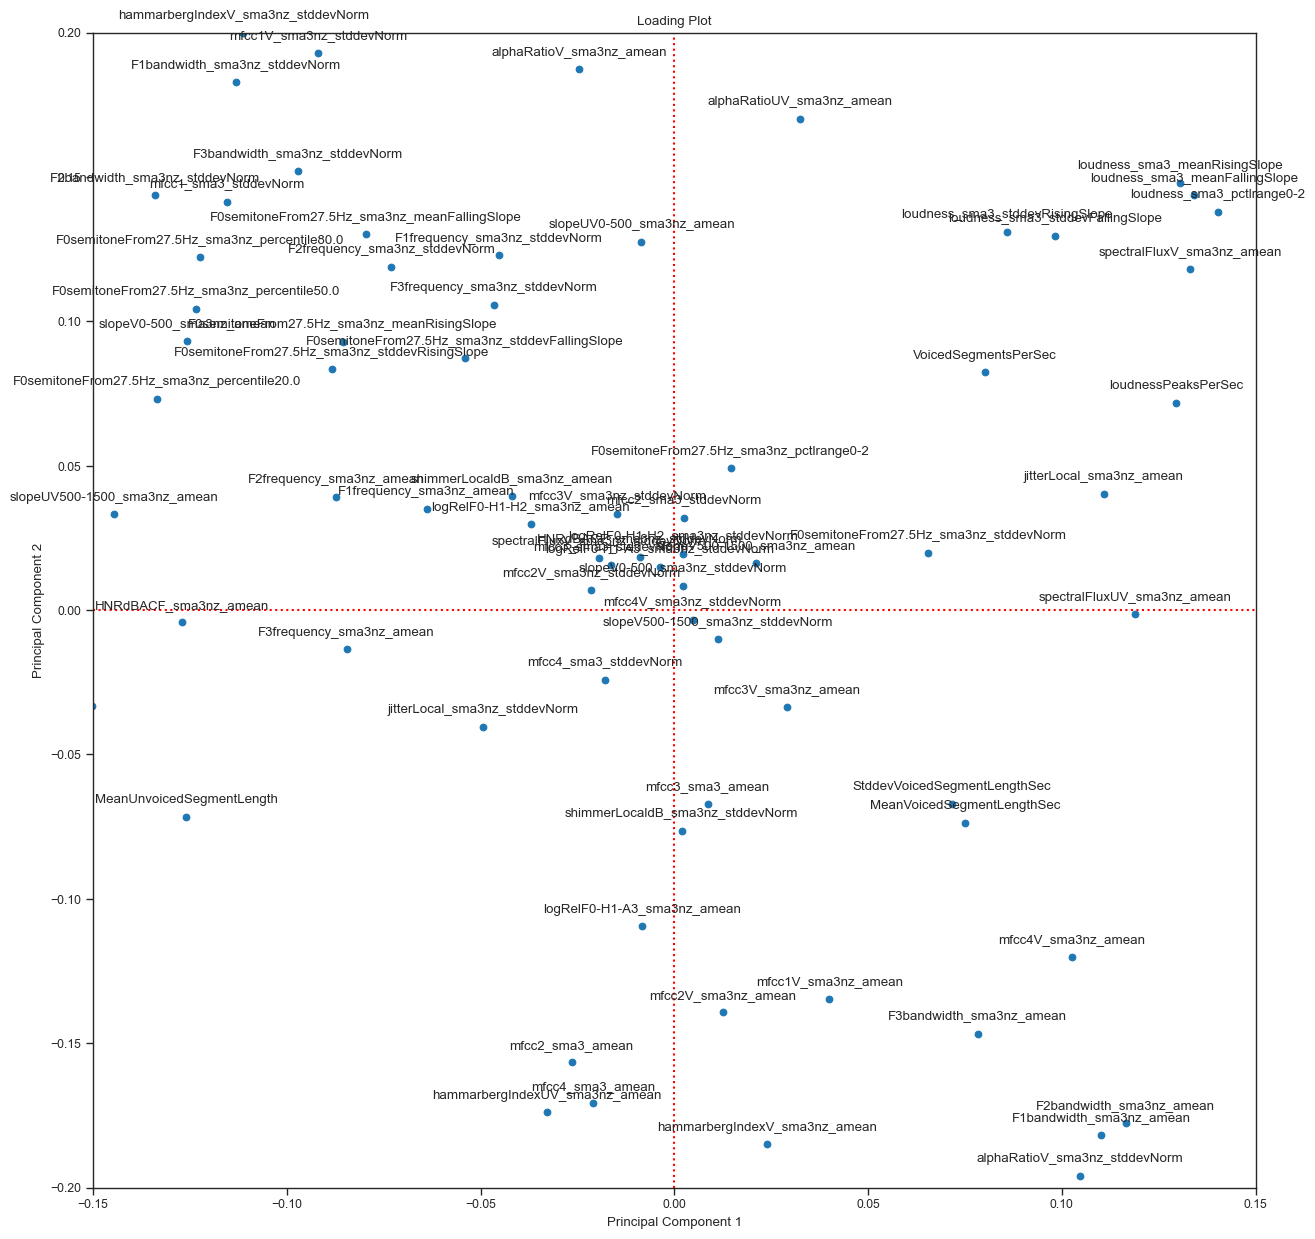

In [27]:
plt.figure(figsize=(15,15))
plt.title('Loading Plot')
plt.scatter(x=loadings.loc[1], y=loadings.loc[2])
plt.axhline(y=0, color='r', linestyle=':', linewidth=1.5)
plt.axvline(x=0, color='r', linestyle=':', linewidth=1.5)
plt.xlim(-0.15, 0.15)
plt.ylim(-0.20, 0.20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i, feature in enumerate(features):
    plt.annotate(feature, (loadings.loc[1][feature], loadings.loc[2][feature]), # Coordinates of the point
                 textcoords="offset points", # How to position the text
                 xytext=(0,10), # Distance from the point to the text
                 ha='center') # Horizontal alignment of the text

output_file = os.path.join(output_dir, 'clf_egemaps_loadings.png')
plt.savefig(output_file, dpi=500, bbox_inches='tight')

### Ordered features by distance from origin

In [28]:
def distance_vector(v):
    return math.sqrt(sum([i**2 for i in v]))

print("Test")
print(distance_vector([3, 4]), distance_vector([-3, 4]), distance_vector([3, -4]), distance_vector([-3, -4]))
print(distance_vector([3, 4, 4]), distance_vector([3, 4, 5]), distance_vector([3, 4, 6]))
print(distance_vector([3, 4, 4]), distance_vector([4, 4, 4]), distance_vector([5, 4, 4]))

Test
5.0 5.0 5.0 5.0
6.4031242374328485 7.0710678118654755 7.810249675906654
6.4031242374328485 6.928203230275509 7.54983443527075


In [29]:
comp_1_5 = loadings.loc[:5]
comp_1_5.loc['distance'] = comp_1_5.apply(lambda x: distance_vector(x))
sorted_column_order = comp_1_5.loc['distance'].sort_values(ascending=False).index
comp_1_5 = comp_1_5[sorted_column_order]

output_file = os.path.join(output_dir, 'clf_egemaps_loadings_distance.csv')
comp_1_5.to_csv(output_file)

comp_1_5

/var/folders/ny/jv8cwgpx7ng41dfgnqsvzdnw0000gn/T/ipykernel_8323/3116864979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_1_5.loc['distance'] = comp_1_5.apply(lambda x: distance_vector(x))


,jitterLocal_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,logRelF0-H1-H2_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,MeanVoicedSegmentLengthSec,F1frequency_sma3nz_amean,F3frequency_sma3nz_amean,shimmerLocaldB_sma3nz_amean,F2frequency_sma3nz_amean,VoicedSegmentsPerSec,...,logRelF0-H1-A3_sma3nz_stddevNorm,mfcc4V_sma3nz_stddevNorm,mfcc4_sma3_stddevNorm,mfcc3V_sma3nz_stddevNorm,mfcc2_sma3_stddevNorm,mfcc3_sma3_stddevNorm,mfcc2V_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_stddevNorm,HNRdBACF_sma3nz_stddevNorm,slopeV0-500_sma3nz_stddevNorm
1,0.110854,0.014525,-0.037079,0.065462,0.075011,-0.063931,-0.084564,-0.041977,-0.087290,0.080225,...,-0.003827,0.004723,-0.017930,-0.014825,0.002452,-0.016389,-0.021507,0.002201,-0.008983,0.002140
2,0.040204,0.049092,0.029749,0.019913,-0.073710,0.035122,-0.013587,0.039547,0.039271,0.082327,...,0.014944,-0.003302,-0.024128,0.033296,0.032020,0.015652,0.006885,0.019411,0.018454,0.008488
3,-0.097280,-0.088824,0.038809,-0.175510,-0.039537,0.161288,0.182546,-0.066659,0.140993,-0.131175,...,0.000152,-0.036755,-0.005461,-0.005183,-0.008042,-0.021729,0.024888,0.012851,0.028015,-0.003725
4,0.094613,0.180967,-0.183668,0.263334,0.115911,0.227337,0.220609,0.144148,0.237448,-0.066071,...,-0.081621,0.033537,0.037824,0.038233,0.011238,0.027476,-0.029835,-0.004863,0.002491,0.014287
5,0.330334,0.276793,0.286327,0.071645,-0.281223,0.113585,0.072042,0.256264,0.075403,0.236260,...,0.033589,0.054714,0.039855,-0.030550,0.033560,0.017897,0.003436,0.034755,0.001601,0.015793
distance,0.376086,0.346228,0.345663,0.331608,0.324261,0.309707,0.307436,0.306952,0.301841,0.301006,...,0.089600,0.074179,0.062869,0.061240,0.048461,0.045398,0.045070,0.042170,0.034855,0.023325


In [30]:
for feature in comp_1_5.columns:
    d = round(comp_1_5.loc['distance', feature], ndigits=5)
    print(d, feature)

0.37609 jitterLocal_sma3nz_amean
0.34623 F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2
0.34566 logRelF0-H1-H2_sma3nz_amean
0.33161 F0semitoneFrom27.5Hz_sma3nz_stddevNorm
0.32426 MeanVoicedSegmentLengthSec
0.30971 F1frequency_sma3nz_amean
0.30744 F3frequency_sma3nz_amean
0.30695 shimmerLocaldB_sma3nz_amean
0.30184 F2frequency_sma3nz_amean
0.30101 VoicedSegmentsPerSec
0.29753 HNRdBACF_sma3nz_amean
0.29571 StddevVoicedSegmentLengthSec
0.29412 jitterLocal_sma3nz_stddevNorm
0.29007 F0semitoneFrom27.5Hz_sma3nz_percentile20.0
0.28768 logRelF0-H1-A3_sma3nz_amean
0.28712 slopeV0-500_sma3nz_amean
0.28081 loudness_sma3_meanRisingSlope
0.27946 loudness_sma3_stddevRisingSlope
0.27819 alphaRatioUV_sma3nz_amean
0.27817 spectralFluxUV_sma3nz_amean
0.27724 hammarbergIndexV_sma3nz_amean
0.27723 loudness_sma3_stddevNorm
0.27554 loudness_sma3_meanFallingSlope
0.27379 F1frequency_sma3nz_stddevNorm
0.27249 alphaRatioV_sma3nz_amean
0.27052 shimmerLocaldB_sma3nz_stddevNorm
0.2693 loudness_sma3_stddevFallingSlope
0

## LFTK PCA

In [31]:
df[df['feature_set']=='LFTK']

,feature_set,model,cv_english,cv_std,ev_english_1,ev_english_2,ev_greek,ev_chinese
6,LFTK,SVM,0.81,0.03,0.60,0.46,0.50,0.49
7,LFTK,Random Forest,0.80,0.04,0.64,0.53,0.47,0.42
8,LFTK,Logistic Regression,0.73,0.03,0.64,0.50,0.55,0.49
9,LFTK,XGBoost,0.80,0.04,0.55,0.55,0.47,0.51
10,LFTK,Naive Bayes,0.67,0.05,0.55,0.51,0.50,0.50
11,LFTK,Multilayer Perceptron,0.80,0.02,0.58,0.50,0.50,0.50


SVM will be analyzed.

In [32]:
model = '/Users/jimuelcelestejr/Downloads/Dataset/Thesis - Machine Learning/Classification/Nested Cross-Validation/LFTK/svm_classifier/final_model/model.pkl'
with open(model, 'rb') as f:
    pipe = pickle.load(f)

In [33]:
pipe

Pipeline(steps=[('feature_scaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('model', SVC(C=10, gamma=0.01, kernel='poly'))])

### Scree Plot

In [34]:
pca = pipe[1]
pca

PCA(n_components=0.9)

In [35]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.23494003, 0.14463815, 0.07332598, 0.05877045, 0.04335709,
       0.03110329, 0.02928533, 0.02765298, 0.02581342, 0.02366269,
       0.02232066, 0.02137629, 0.01859523, 0.01734731, 0.01692176,
       0.01577699, 0.01507177, 0.01375964, 0.01285961, 0.01209427,
       0.01094652, 0.01019522, 0.00995436, 0.00936145, 0.00921207])

In [36]:
len(pca.components_)

25

25 PCA components capture at least 90% of the variance.

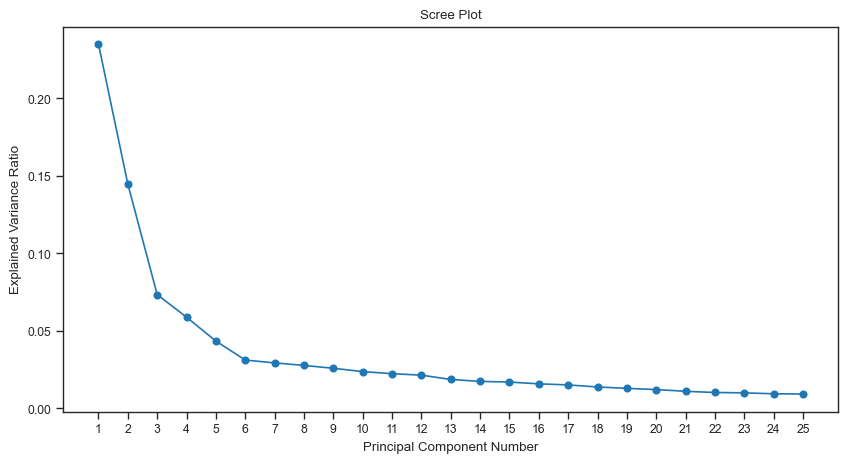

In [37]:
comp_nums = range(1, len(explained_variance_ratio) + 1)
plt.figure(figsize=(10, 5))
plt.xticks(comp_nums)
plt.plot(comp_nums, explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio') # Eigenvalue

output_file = os.path.join(output_dir, 'clf_lftk_scree.png')
plt.savefig(output_file, dpi=500, bbox_inches='tight')

In [38]:
sum(explained_variance_ratio[0:4])

0.5116746035471862

4 principal components capture 51% of the variance.

#### Loadings Plot

In [39]:
sca = pipe[0]
sca

StandardScaler()

In [40]:
features = sca.feature_names_in_
comp = pca.components_
loadings = pd.DataFrame(comp, columns=features)
loadings = loadings.set_axis(range(1, len(loadings) + 1))

output_file = os.path.join(output_dir, 'clf_lftk_loadings.csv')
loadings.to_csv(output_file)

loadings

,t_word,t_stopword,t_punct,t_uword,t_sent,t_char,a_word_ps,a_char_ps,a_char_pw,t_n_ent,...,a_noun_ps,a_num_ps,a_part_ps,a_pron_ps,a_propn_ps,a_punct_ps,a_sconj_ps,a_sym_ps,a_verb_ps,a_space_ps
1,0.169992,0.169087,0.125583,0.177647,0.115386,0.172943,0.012916,0.011095,-0.004353,0.111147,...,0.008042,0.023882,-0.003298,0.017100,0.025465,0.011240,0.043363,0.0,0.004251,-0.079677
2,-0.053825,-0.041341,-0.123859,0.017321,-0.131777,-0.033788,0.173668,0.177362,0.162599,0.030073,...,0.178080,0.137144,0.134234,0.136874,0.063055,-0.014458,0.117862,-0.0,0.167629,0.126264
3,0.038133,0.058852,0.006336,-0.033424,0.012416,0.032588,0.198452,0.192935,-0.035880,-0.052163,...,0.170345,0.159092,0.159071,0.223916,-0.009196,-0.054686,0.162263,-0.0,0.200065,0.143346
4,-0.019062,-0.005760,-0.008288,0.001318,-0.016086,-0.023536,0.008269,0.006842,0.006815,-0.108583,...,-0.031201,-0.083616,0.098774,0.056308,-0.011519,-0.005350,0.038547,-0.0,0.030147,-0.003672
5,-0.011867,-0.039753,0.048921,-0.012896,0.052548,-0.018687,0.042575,0.050501,-0.027545,0.169904,...,0.056377,0.094120,0.068571,0.023380,0.287430,-0.020297,0.027723,0.0,0.047084,0.093721
6,-0.016481,-0.024865,0.039724,-0.015983,0.042253,-0.027784,0.006902,0.003990,-0.042790,0.023799,...,0.013859,0.119110,-0.011964,0.029515,-0.065459,-0.000192,-0.098369,0.0,-0.010145,-0.083886
7,-0.037646,-0.007633,-0.088056,0.005232,-0.101551,-0.027139,-0.048264,-0.049866,-0.019252,0.052639,...,-0.065082,0.032205,-0.069343,-0.012803,-0.093710,0.027287,0.085175,-0.0,-0.031121,0.021021
8,0.011458,-0.017800,0.065036,0.004196,0.033340,-0.000993,0.043129,0.037376,-0.102817,-0.035006,...,0.067335,-0.000988,0.002676,-0.030264,-0.100925,0.113094,0.045225,-0.0,-0.018700,0.066578
9,0.005109,-0.008387,0.057343,-0.023768,0.071368,-0.009812,-0.029799,-0.029989,-0.061292,0.084835,...,-0.032185,0.039554,0.015824,-0.024296,0.007951,-0.024483,0.087090,0.0,-0.020411,0.003264
10,-0.054922,-0.054089,-0.060429,-0.030213,-0.044231,-0.049204,-0.031003,-0.027732,0.016757,-0.023260,...,-0.025928,-0.022295,-0.068698,-0.061243,0.034142,-0.087061,0.079512,0.0,-0.063600,-0.059160


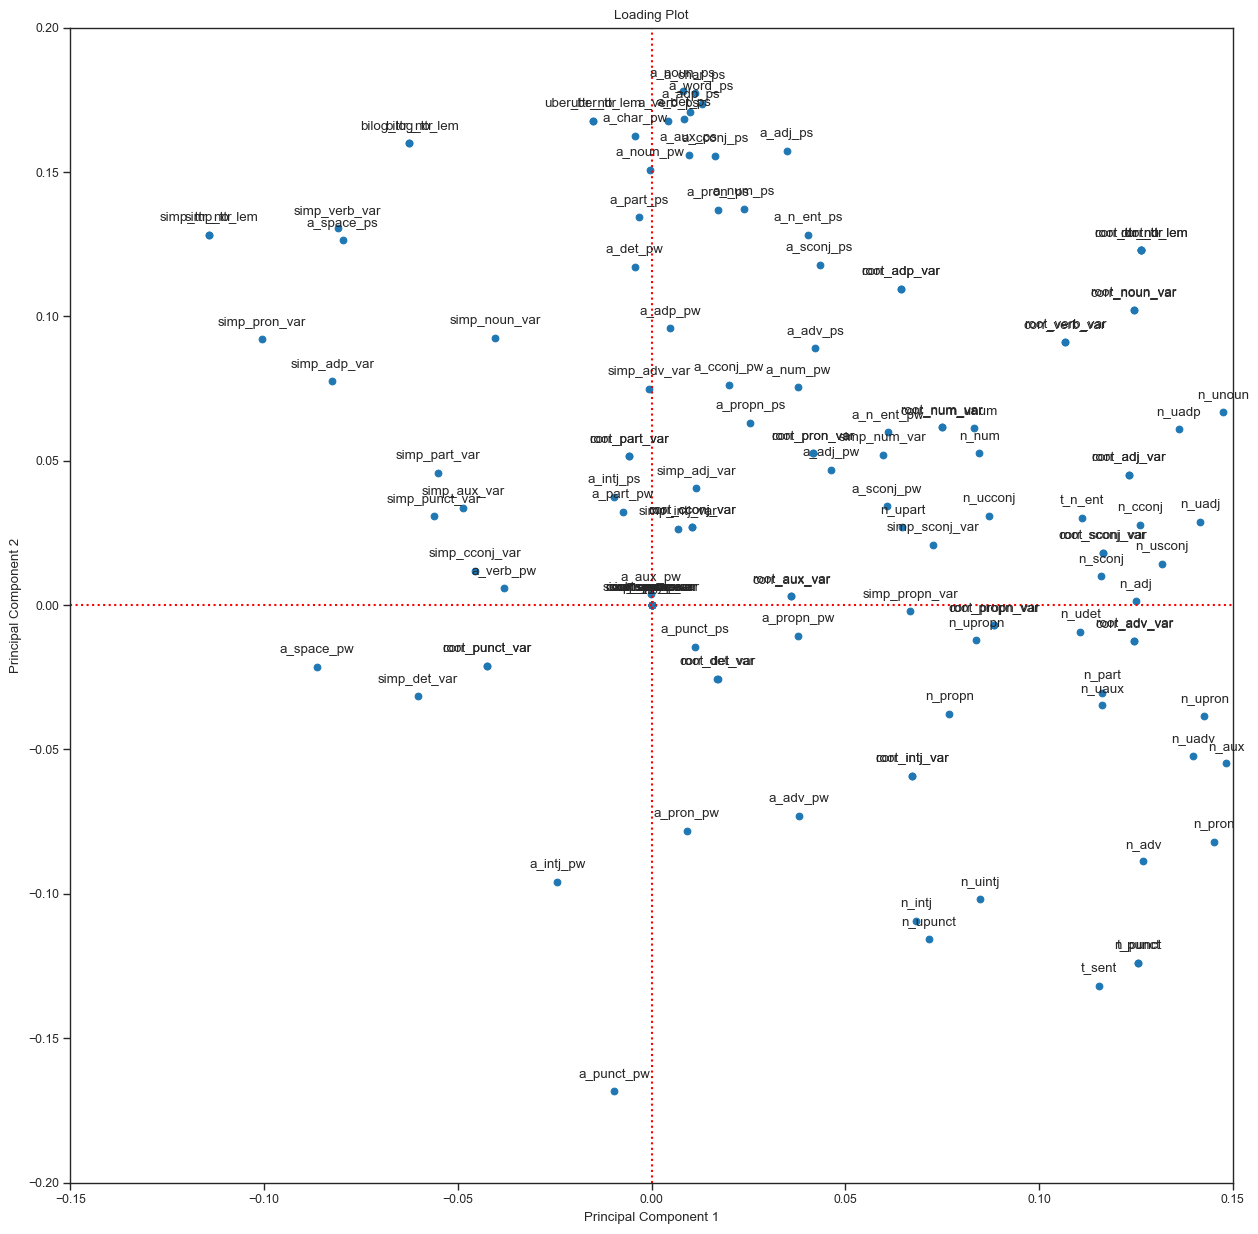

In [41]:
plt.figure(figsize=(15,15))
plt.title('Loading Plot')
plt.scatter(x=loadings.loc[1], y=loadings.loc[2])
plt.axhline(y=0, color='r', linestyle=':', linewidth=1.5)
plt.axvline(x=0, color='r', linestyle=':', linewidth=1.5)
plt.xlim(-0.15, 0.15)
plt.ylim(-0.20, 0.20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i, feature in enumerate(features):
    plt.annotate(feature, (loadings.loc[1][feature], loadings.loc[2][feature]), # Coordinates of the point
                 textcoords="offset points", # How to position the text
                 xytext=(0,10), # Distance from the point to the text
                 ha='center') # Horizontal alignment of the text

output_file = os.path.join(output_dir, 'clf_lftk_loadings.png')
plt.savefig(output_file, dpi=500, bbox_inches='tight')

In [42]:
comp_1_4 = loadings.loc[:4]
comp_1_4.loc['distance'] = comp_1_4.apply(lambda x: distance_vector(x))
sorted_column_order = comp_1_4.loc['distance'].sort_values(ascending=False).index
comp_1_4 = comp_1_4[sorted_column_order]

output_file = os.path.join(output_dir, 'clf_lftk_loadings_distance.csv')
comp_1_4.to_csv(output_file)

comp_1_4

/var/folders/ny/jv8cwgpx7ng41dfgnqsvzdnw0000gn/T/ipykernel_8323/1975172468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_1_4.loc['distance'] = comp_1_4.apply(lambda x: distance_vector(x))


,a_pron_ps,a_word_ps,a_verb_ps,a_char_ps,a_aux_ps,a_adp_ps,a_noun_ps,a_det_ps,uber_ttr,uber_ttr_no_lem,...,a_sym_ps,root_sym_var,a_sym_pw,corr_space_var,n_space,n_uspace,root_space_var,n_sym,n_usym,simp_sym_var
1,0.017100,0.012916,0.004251,0.011095,0.009539,0.009992,0.008042,0.008432,-0.015119,-0.015119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.136874,0.173668,0.167629,0.177362,0.155795,0.170854,0.178080,0.168195,0.167685,0.167685,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,0.223916,0.198452,0.200065,0.192935,0.199521,0.181217,0.170345,0.179476,-0.150909,-0.150909,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,0.056308,0.008269,0.030147,0.006842,0.037921,-0.028337,-0.031201,-0.032578,0.102200,0.102200,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
distance,0.268953,0.264157,0.262779,0.262395,0.256144,0.250866,0.248532,0.248261,0.248123,0.248123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
for feature in comp_1_4.columns:
    d = round(comp_1_4.loc['distance', feature], ndigits=5)
    print(d, feature)

0.26895 a_pron_ps
0.26416 a_word_ps
0.26278 a_verb_ps
0.26239 a_char_ps
0.25614 a_aux_ps
0.25087 a_adp_ps
0.24853 a_noun_ps
0.24826 a_det_ps
0.24812 uber_ttr
0.24812 uber_ttr_no_lem
0.23829 bilog_ttr_no_lem
0.23829 bilog_ttr
0.23559 a_cconj_ps
0.23041 a_part_ps
0.22806 corr_ttr_no_lem
0.22806 corr_ttr
0.22805 root_ttr_no_lem
0.22805 root_ttr
0.22733 a_num_ps
0.22643 a_noun_pw
0.22242 a_adv_ps
0.2141 corr_aux_var
0.21408 root_aux_var
0.21049 n_unum
0.20924 simp_verb_var
0.20877 a_sconj_ps
0.20787 simp_ttr_no_lem
0.20787 simp_ttr
0.20701 a_space_ps
0.20235 n_upart
0.20118 simp_noun_var
0.2001 corr_noun_var
0.2001 root_noun_var
0.19741 corr_num_var
0.19741 root_num_var
0.19735 n_uaux
0.19704 a_num_pw
0.19681 n_num
0.19665 n_unoun
0.19525 a_det_pw
0.1929 a_intj_ps
0.1925 n_noun
0.19089 a_pron_pw
0.19068 n_pron
0.18794 a_part_pw
0.18754 n_det
0.18574 a_adj_ps
0.18397 n_adv
0.18384 t_stopword
0.18334 t_word
0.1816 t_uword
0.18074 t_char
0.1798 a_punct_pw
0.1772 simp_pron_var
0.17669 t_punct


## Discussion

1. BoAW performed the worst for the problem; it is also the most non-interpretable among the other models. As expected, wav2vec and BERT performed the best with mean UAR=0.86 and UAR=0.84, respectively. The interpretable features eGeMAPS and LFTK have performance that are lower with UAR=0.67 and UAR=0.77, respectively. Relatively, the linguistic features have better performance. The main trade-off between the handcrafted features and learned embeddings is interpretability. There is no way of knowing which parts of speech wav2vec and BERT capture, but they performed well; meanwhile with eGeMAPS and LFTK, the parts of speech that contribute to the variance of the data can be known, i.e., through the principal component analysis (PCA).

2. NB performed the worst, and it may be due to the non-normal distribution of samples. We did not include a normalization step for NB. SVM, Random Forest, XGB, and MLP have previously been found to perform well in this area.

3. The interpretable features are consistent with prior findings and the expectations from clinical manifestations.

4. Best performing model:

(Acoustic)
- Handcrafted: eGeMAPS + SCA + PCA + MLP
- Embeddings: wav2vec + SCA + PCA + MLP

(Linguistic) 
- Handcrafted: LFTK + SCA + PCA + SVM
- Embeddings: BERT + SCA + PCA + SVM